In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Optional for warnings
import warnings
warnings.filterwarnings("ignore")




In [5]:
# Load dataset
df = pd.read_csv("housing.csv")  # replace with your CSV path

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Quick overview
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [18]:
# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Your dataset has no missing values, so no imputation needed
# Optional: Convert categorical columns to string type
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    df[col] = df[col].astype(str)

# Confirm cleaned dataset
print("Cleaned dataset shape:", df.shape)
print(df.columns)




Missing values before cleaning:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Cleaned dataset shape: (545, 13)
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [7]:
# Target and Features
y = df['price']
X = df.drop('price', axis=1)

numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']



In [8]:
# Numeric and categorical transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train Linear Regression
pipeline_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluation
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))



Linear Regression MSE: 1754318687330.6675
Linear Regression R²: 0.6529242642153177


In [22]:
# Pipeline: preprocessing + Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

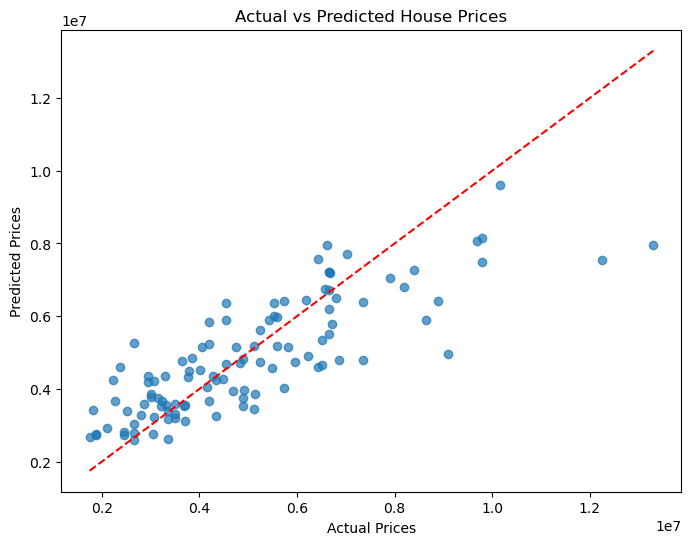

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [28]:
print("### Difference Between Two Scatter Plot Blocks\n")

print("First Block:")
print("- Plots actual vs predicted house prices.")
print("- Includes a red dashed line representing perfect predictions (y_test = y_pred).")
print("- Simple and quick visualization.")
print("- Does NOT show residuals, so harder to analyze prediction errors in detail.\n")


### Difference Between Two Scatter Plot Blocks

First Block:
- Plots actual vs predicted house prices.
- Includes a red dashed line representing perfect predictions (y_test = y_pred).
- Simple and quick visualization.
- Does NOT show residuals, so harder to analyze prediction errors in detail.



In [14]:
print("Model Summaryy:")
print("-" * 40)
print(f"R-squared: {r2:.4f} -> The model explains ~65% of the variability in house prices.")
print(f"Mean Squared Error: {mse:.2f} -> On average, squared deviations of predictions are {mse:.2f}.")

print("\nKey Insights:")
print("- Houses with larger areas, more bedrooms, and additional amenities (AC, basement, prefarea) tend to have higher prices.")
print("- The model performs reasonably well but could be improved by considering additional features like location-specific data, age of the property, or local market trends.")

print("\nRecommendations:")
print("- Real estate agencies can use this model as a baseline price predictor.")
print("- For better accuracy, consider advanced models like Random Forest or Gradient Boosting.")
print("- Visualizing predicted vs actual prices (scatter plot) helps identify where the model under or over-predicts.")


Model Summaryy:
----------------------------------------
R-squared: 0.6529 -> The model explains ~65% of the variability in house prices.
Mean Squared Error: 1754318687330.67 -> On average, squared deviations of predictions are 1754318687330.67.

Key Insights:
- Houses with larger areas, more bedrooms, and additional amenities (AC, basement, prefarea) tend to have higher prices.
- The model performs reasonably well but could be improved by considering additional features like location-specific data, age of the property, or local market trends.

Recommendations:
- Real estate agencies can use this model as a baseline price predictor.
- For better accuracy, consider advanced models like Random Forest or Gradient Boosting.
- Visualizing predicted vs actual prices (scatter plot) helps identify where the model under or over-predicts.


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Using Random Forest Regressor
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Cross-validation to evaluate performance
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R-squared (Random Forest): {cv_scores.mean():.4f}")

# Train on full training data
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.4f}")


Cross-validated R-squared (Random Forest): 0.5969
Random Forest MSE: 1959323004717.27
Random Forest R-squared: 0.6124


In [24]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [5, 10, None],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R²:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Best cross-validated R²: 0.6072349427516099


In [25]:
y_pred_best = grid_search.predict(X_test)

print("Tuned Random Forest MSE:", mean_squared_error(y_test, y_pred_best))
print("Tuned Random Forest R²:", r2_score(y_test, y_pred_best))


Tuned Random Forest MSE: 2085750240609.6758
Tuned Random Forest R²: 0.5873535950733262


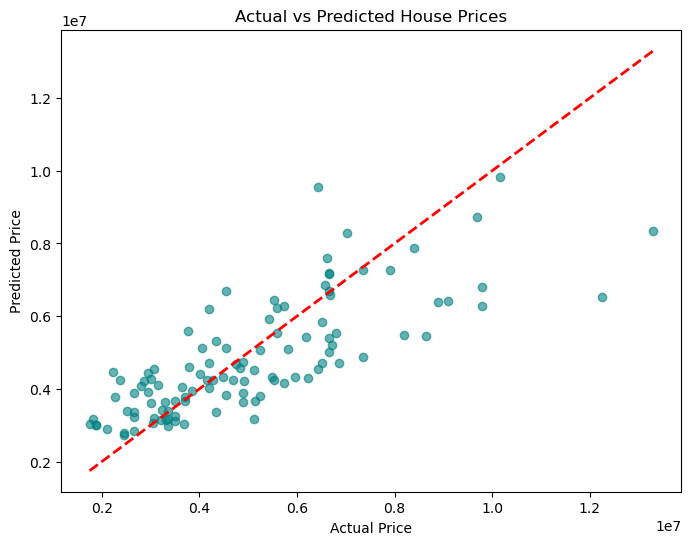

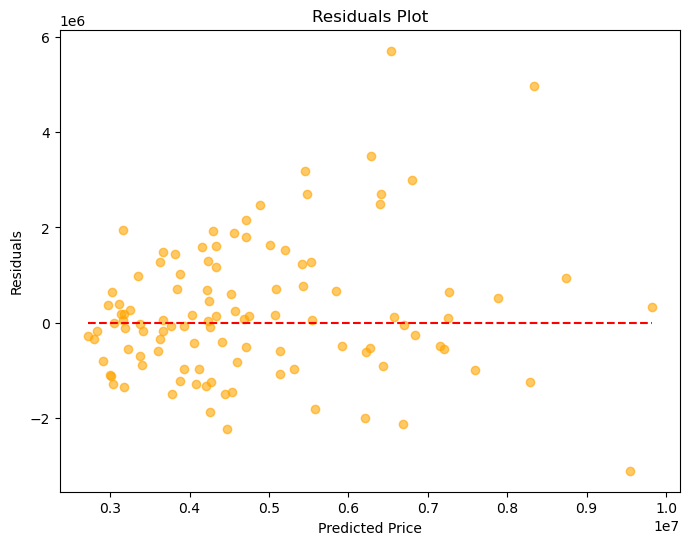

In [27]:


# Predict on the test set using the tuned Random Forest
y_pred = grid_search.best_estimator_.predict(X_test)

# Scatter plot: actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Optional: residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='orange')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


In [29]:
print("Second Block:")
print("- Also plots actual vs predicted house prices with color and line width customization.")
print("- Includes a residuals plot to visualize y_test - y_pred against predicted values.")
print("- Helps detect patterns in errors, underfitting/overfitting, and heteroscedasticity.")
print("- Provides a more complete diagnostic of model performance.")

Second Block:
- Also plots actual vs predicted house prices with color and line width customization.
- Includes a residuals plot to visualize y_test - y_pred against predicted values.
- Helps detect patterns in errors, underfitting/overfitting, and heteroscedasticity.
- Provides a more complete diagnostic of model performance.


In [32]:
print("3. rRecommendations:")
print("- Consider more advanced models like Gradient Boosting or XGBoost for potentially better accuracy.")
print("- Feature engineering could improve model performance (e.g., interaction terms, polynomial features).")
print("- Regular retraining recommended if new housing data becomes available.")
print("- Visual diagnostics like residual plots should always be reviewed to detect bias or heteroscedasticity...")

3. rRecommendations:
- Consider more advanced models like Gradient Boosting or XGBoost for potentially better accuracy.
- Feature engineering could improve model performance (e.g., interaction terms, polynomial features).
- Regular retraining recommended if new housing data becomes available.
- Visual diagnostics like residual plots should always be reviewed to detect bias or heteroscedasticity...
